# Online Course Recommendation System
### Exploratory Data Analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('Datasets/online_course_recommendation_v2.xlsx')

In [4]:
df.head()

,user_id,course_id,course_name,instructor,course_duration_hours,certification_offered,difficulty_level,rating,enrollment_numbers,course_price,feedback_score,study_material_available,time_spent_hours,previous_courses_taken
0,15796,9366,Python for Beginners,Emma Harris,39.1,Yes,Beginner,5.0,21600,317.50,0.797,Yes,17.60,4
1,861,1928,Cybersecurity for Professionals,Alexander Young,36.3,Yes,Beginner,4.3,15379,40.99,0.770,Yes,28.97,9
2,38159,9541,DevOps and Continuous Deployment,Dr. Mia Walker,13.4,Yes,Beginner,3.9,6431,380.81,0.772,Yes,52.44,4
3,44733,3708,Project Management Fundamentals,Benjamin Lewis,58.3,Yes,Beginner,3.1,48245,342.80,0.969,No,22.29,6
4,11285,3361,Ethical Hacking Masterclass,Daniel White,30.8,Yes,Beginner,2.8,34556,381.01,0.555,Yes,22.01,5


In [5]:
## shape of the datasets
df.shape

(100000, 14)

In [6]:
## let's check for the null values present in the datasets
df.isnull().sum()

user_id                     0
course_id                   0
course_name                 0
instructor                  0
course_duration_hours       0
certification_offered       0
difficulty_level            0
rating                      0
enrollment_numbers          0
course_price                0
feedback_score              0
study_material_available    0
time_spent_hours            0
previous_courses_taken      0
dtype: int64

#### So, we have no null values present in the dataset.

In [9]:
## information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   user_id                   100000 non-null  int64  
 1   course_id                 100000 non-null  int64  
 2   course_name               100000 non-null  object 
 3   instructor                100000 non-null  object 
 4   course_duration_hours     100000 non-null  float64
 5   certification_offered     100000 non-null  object 
 6   difficulty_level          100000 non-null  object 
 7   rating                    100000 non-null  float64
 8   enrollment_numbers        100000 non-null  int64  
 9   course_price              100000 non-null  float64
 10  feedback_score            100000 non-null  float64
 11  study_material_available  100000 non-null  object 
 12  time_spent_hours          100000 non-null  float64
 13  previous_courses_taken    100000 non-null  in

In [10]:
## description for the data
df.describe()

,user_id,course_id,course_duration_hours,rating,enrollment_numbers,course_price,feedback_score,time_spent_hours,previous_courses_taken
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,24935.663570,5006.863560,52.38354,3.959859,25052.822850,261.073369,0.746865,20.691054,4.992670
std,14406.960108,2882.085456,27.42347,0.729958,14388.188356,139.013758,0.143683,13.669148,2.237259
min,1.000000,1.000000,5.00000,1.000000,50.000000,20.000000,0.092000,1.000000,0.000000
25%,12487.750000,2523.000000,28.60000,3.500000,12583.750000,140.100000,0.649000,9.900000,3.000000
50%,24793.500000,5012.000000,52.40000,4.000000,25057.500000,262.310000,0.750000,19.920000,5.000000
75%,37382.250000,7502.000000,76.10000,4.500000,37522.000000,381.702500,0.851000,30.080000,6.000000
max,49999.000000,9999.000000,100.00000,5.000000,49999.000000,500.000000,1.000000,84.150000,19.000000


In [35]:
courses_offered = df.course_name.value_counts().keys().tolist()
print(f'{len(df.course_name.value_counts())} unique courses are offered')

20 unique courses are offered


In [36]:
instructors = df.instructor.value_counts().keys().tolist()
print(f'Number of instructors works with us are {len(instructors)}')

Number of instructors works with us are 20


In [34]:
print(f'Number of instructors works with us are {len(instructors)}')

Number of instructors works with us are 20


### Analysis on Courses Offered

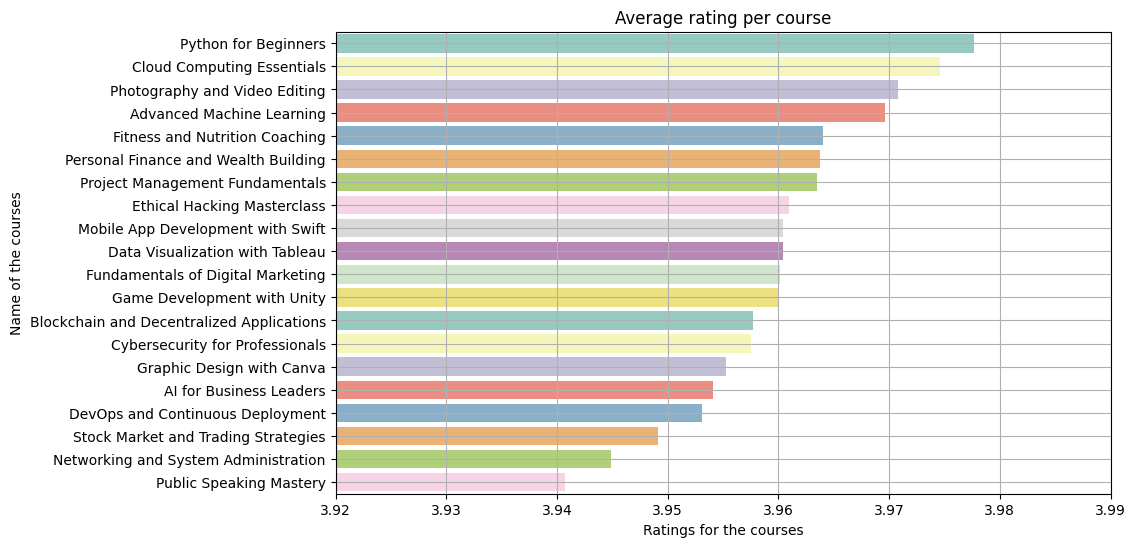

In [96]:
average_course_rating = df.groupby('course_name')['rating'] \
                          .mean() \
                          .sort_values(ascending=False) \
                          .reset_index()

plt.figure(figsize=(10,6))
plt.title('Average rating per course')
sns.barplot(data=average_course_rating, y='course_name', x='rating', palette='Set3')
plt.ylabel('Name of the courses')
plt.xlabel('Ratings for the courses')
plt.xlim(3.92, 3.99)
plt.grid()
plt.show()

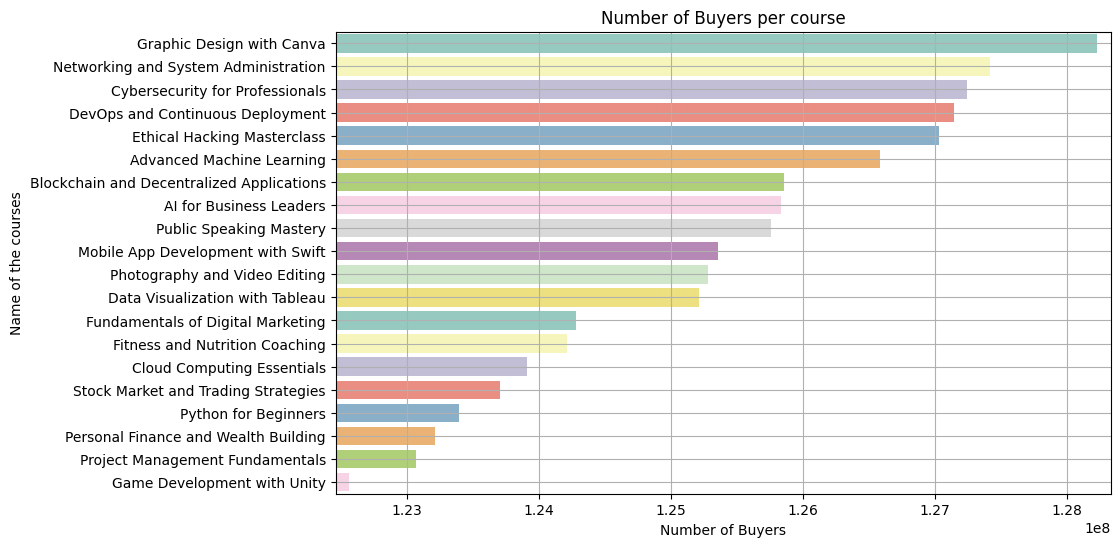

In [116]:
course_enrollment_numbers = df.groupby('course_name')['enrollment_numbers'] \
  .sum() \
  .sort_values(ascending = False) \
  .reset_index()
plt.figure(figsize=(10,6))
plt.title('Number of Buyers per course')
sns.barplot(data=course_enrollment_numbers, y='course_name', x='enrollment_numbers', palette='Set3')
plt.ylabel('Name of the courses')
plt.xlabel('Number of Buyers')
plt.xlim(course_enrollment_numbers.enrollment_numbers.min()-100000, course_enrollment_numbers.enrollment_numbers.max()+100000)
plt.grid()
plt.show()

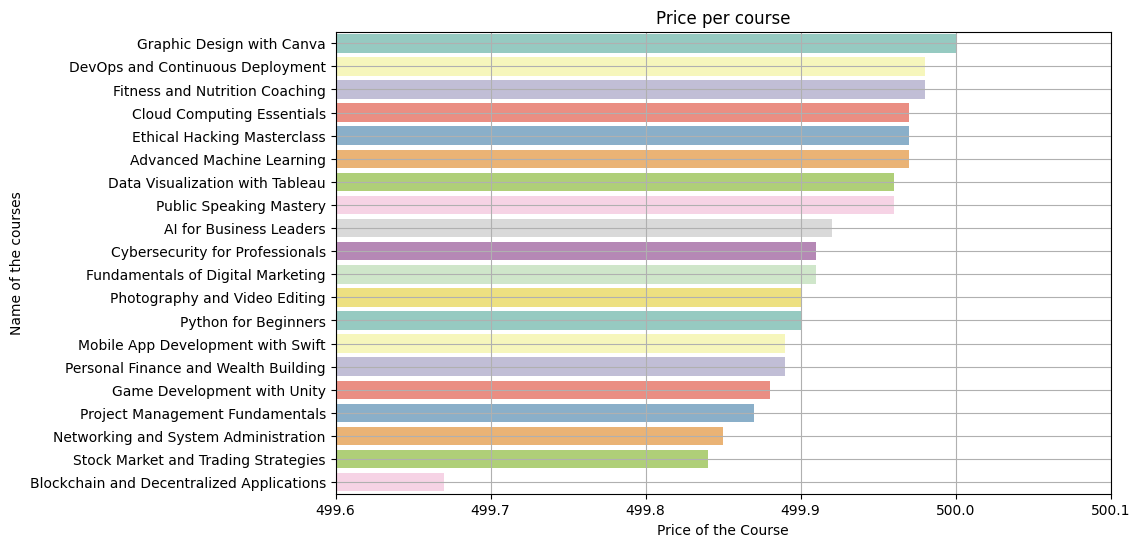

In [153]:
course_with_price = df.groupby('course_name')['course_price'] \
  .max() \
  .sort_values(ascending = False) \
  .reset_index()
plt.figure(figsize=(10,6))
plt.title('Price per course')
sns.barplot(data=course_with_price, y='course_name', x='course_price', palette='Set3')
plt.ylabel('Name of the courses')
plt.xlabel('Price of the Course')
plt.xlim(499.6, 500.1)
plt.grid()
plt.show()

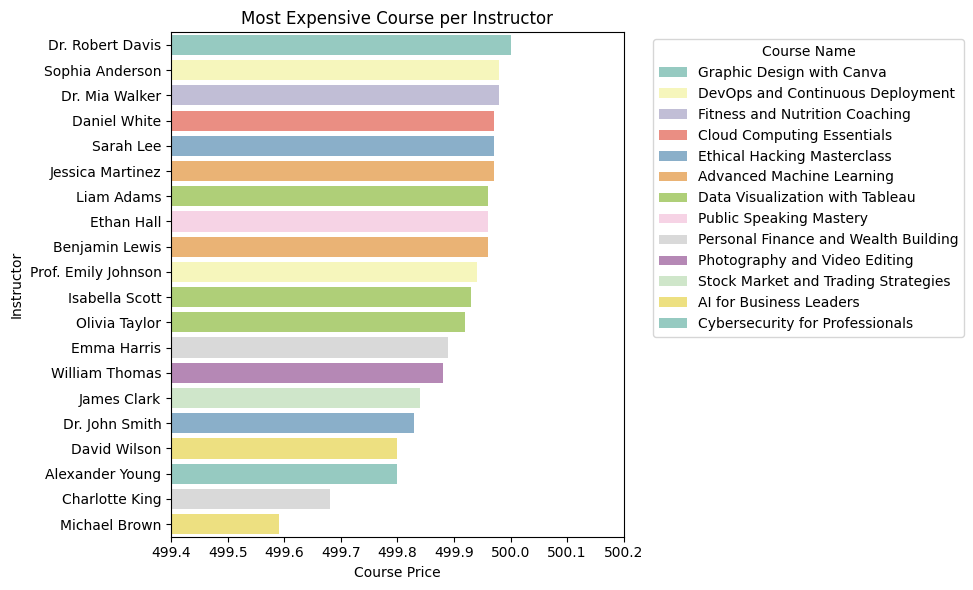

In [147]:
course_instructor_price = df.groupby(['instructor', 'course_name'])['course_price'].max().reset_index()
course_instructor_price = course_instructor_price.sort_values(['instructor', 'course_price'], ascending=[True, False])
top_price_course_per_instructor = course_instructor_price.drop_duplicates(subset='instructor', keep='first')
top_price_course_per_instructor = top_price_course_per_instructor.sort_values('course_price', ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(data=top_price_course_per_instructor, y='instructor', x='course_price', hue='course_name', dodge=False, palette='Set3')
plt.title('Most Expensive Course per Instructor')
plt.xlabel('Course Price')
plt.xlim(499.4, 500.2)
plt.ylabel('Instructor')
plt.legend(title='Course Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

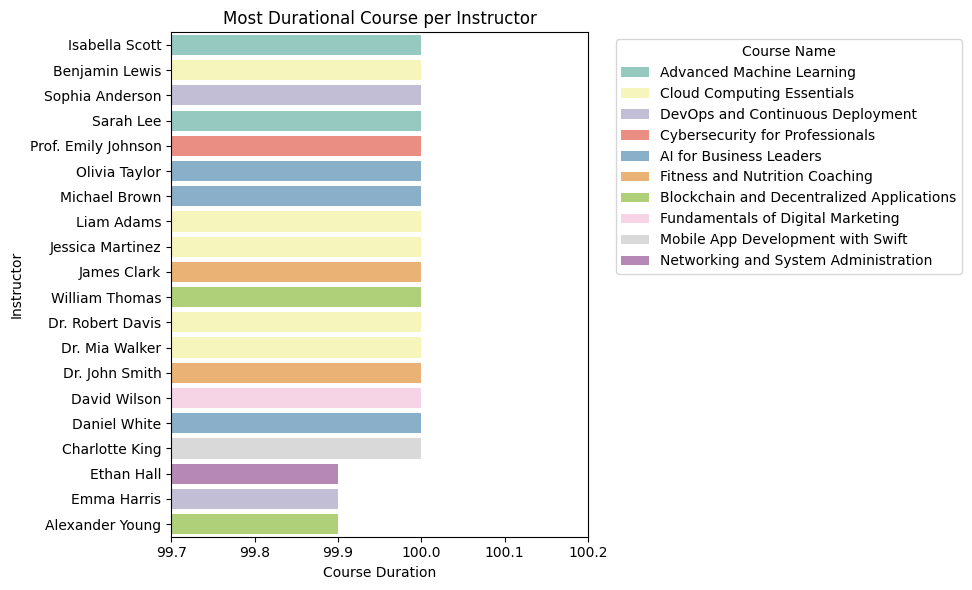

In [161]:
course_instructor_duration = df.groupby(['instructor', 'course_name'])['course_duration_hours'].max().reset_index()
course_instructor_duration = course_instructor_duration.sort_values(['instructor', 'course_duration_hours'], ascending=[True, False])
top_duration_course_per_instructor = course_instructor_duration.drop_duplicates(subset='instructor', keep='first')
top_duration_course_per_instructor = top_duration_course_per_instructor.sort_values('course_duration_hours', ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(data=top_duration_course_per_instructor, y='instructor', x='course_duration_hours', hue='course_name', dodge=False, palette='Set3')
plt.title('Most Durational Course per Instructor')
plt.xlabel('Course Duration')
plt.ylabel('Instructor')
plt.xlim(99.7, 100.2)
plt.legend(title='Course Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Analysis on Instructors

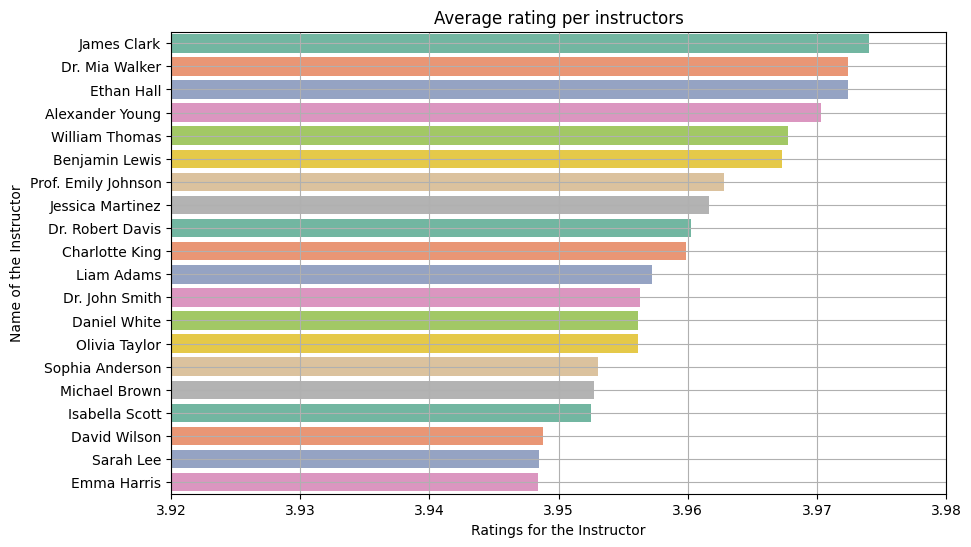

In [81]:
average_instructor_rating = df.groupby('instructor')['rating'] \
                              .mean() \
                              .sort_values(ascending=False) \
                              .reset_index()
plt.figure(figsize=(10,6))
plt.title('Average rating per instructors')
sns.barplot(data=average_instructor_rating, y='instructor', x='rating', palette='Set2')
plt.ylabel('Name of the Instructor')
plt.xlabel('Ratings for the Instructor')
plt.xlim(3.92, 3.98)
plt.grid()
plt.show()

In [162]:
df.head()

,user_id,course_id,course_name,instructor,course_duration_hours,certification_offered,difficulty_level,rating,enrollment_numbers,course_price,feedback_score,study_material_available,time_spent_hours,previous_courses_taken
0,15796,9366,Python for Beginners,Emma Harris,39.1,Yes,Beginner,5.0,21600,317.50,0.797,Yes,17.60,4
1,861,1928,Cybersecurity for Professionals,Alexander Young,36.3,Yes,Beginner,4.3,15379,40.99,0.770,Yes,28.97,9
2,38159,9541,DevOps and Continuous Deployment,Dr. Mia Walker,13.4,Yes,Beginner,3.9,6431,380.81,0.772,Yes,52.44,4
3,44733,3708,Project Management Fundamentals,Benjamin Lewis,58.3,Yes,Beginner,3.1,48245,342.80,0.969,No,22.29,6
4,11285,3361,Ethical Hacking Masterclass,Daniel White,30.8,Yes,Beginner,2.8,34556,381.01,0.555,Yes,22.01,5


In [163]:
df.groupby('instructor')['feedback_score'].mean().reset_index()

,instructor,feedback_score
0,Alexander Young,0.747727
1,Benjamin Lewis,0.749077
2,Charlotte King,0.746060
3,Daniel White,0.746613
4,David Wilson,0.747417
5,Dr. John Smith,0.751522
6,Dr. Mia Walker,0.747925
7,Dr. Robert Davis,0.746416
8,Emma Harris,0.745235
9,Ethan Hall,0.746110
